# Exploratory Data Analysis of Netflix Movies Dataset


**Dataset:**
This dataset, sourced from Kaggle, contains 16 years of Netflix movie records. It includes detailed information about movies available on Netflix such as title, director, release year, genre, duration, country of production, and ratings.

**Objective:**
The objective of this project is to perform an exploratory data analysis (EDA) on Netflix movies to identify key patterns and insights. The analysis focuses on genres, countries, languages, and directors to understand which categories are most popular, highly rated, and financially successful. In addition, global metrics such as ratings, popularity, budget & revenue are analyzed to highlight overall performance trends. This will help compare different aspects of movies and identify factors that contribute most to audience engagement and box office success.

In [259]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
# Import the Movie Dataset and check it structure
movie_df=pd.read_csv('D:/CSV_Files/netflix_movies.csv')
movie_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,5/16/2010,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",7/15/2010,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",11/17/2010,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868


In [261]:
# Shape of the Dataset
print(f'The Total Number of Columns is {movie_df.shape[1]}')
print(f'The Total Number of Rows is {movie_df.shape[0]}')

The Total Number of Columns is 18
The Total Number of Rows is 16000


In [262]:
# Check the Null Values
movie_df.isnull().sum()

show_id             0
type                0
title               0
director          132
cast              204
country           466
date_added          0
release_year        0
rating              0
duration        16000
genres            107
language            0
description       132
popularity          0
vote_count          0
vote_average        0
budget              0
revenue             0
dtype: int64

In [263]:
# Replace missing values in 'director', 'cast', 'country', and 'genres' columns with 'Unknown'
movie_df.fillna({'director':'Unknown','cast':'Unknown','country':'Unknown','genres':'Unknown'}, inplace=True)
# Drop unnecessary columns 'duration' and 'description' from the dataframe
movie_df.drop(columns=['duration','description'],inplace=True)

In [264]:
# after fill the value and drop value
movie_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
genres          0
language        0
popularity      0
vote_count      0
vote_average    0
budget          0
revenue         0
dtype: int64

In [265]:
# Check the number of duplicate rows in the dataset  
movie_df.duplicated().sum()

np.int64(0)

In [266]:
# Check the descriptive statistics
movie_df.describe()

,show_id,release_year,rating,popularity,vote_count,vote_average,budget,revenue
count,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04
mean,5.266582e+05,2017.500000,5.956368,20.384728,718.656125,5.956368,8.766792e+06,2.446308e+07
std,3.794427e+05,4.609916,1.754741,68.610033,2080.198316,1.754741,2.912450e+07,1.116977e+08
min,1.890000e+02,2010.000000,0.000000,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.257258e+05,2013.750000,5.600000,7.840750,53.000000,5.600000,0.000000e+00,0.000000e+00
50%,4.468170e+05,2017.500000,6.300000,10.913500,138.000000,6.300000,0.000000e+00,0.000000e+00
75%,7.739808e+05,2021.250000,6.923000,17.336500,422.000000,6.923000,2.200000e+06,1.654473e+06
max,1.440471e+06,2025.000000,10.000000,3876.006000,37119.000000,10.000000,4.600000e+08,2.799439e+09


In [267]:
# Check the data type and non-null count of all columns in the dataset  
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      16000 non-null  object 
 4   cast          16000 non-null  object 
 5   country       16000 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   genres        16000 non-null  object 
 10  language      16000 non-null  object 
 11  popularity    16000 non-null  float64
 12  vote_count    16000 non-null  int64  
 13  vote_average  16000 non-null  float64
 14  budget        16000 non-null  int64  
 15  revenue       16000 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 2.0+ MB


In [268]:
# Convert the 'date_added' column from object type to datetime format  
movie_df['date_added'] = pd.to_datetime(movie_df['date_added'])

In [269]:
# After converting, check the data type of 'date_added' column  
movie_df['date_added'].dtype

dtype('<M8[ns]')

In [270]:
# Check the number of unique values in each column
movie_df.nunique()

show_id         16000
type                1
title           15483
director         9509
cast            15640
country          1464
date_added       4423
release_year       16
rating           2145
genres           2769
language           74
popularity      11173
vote_count       2693
vote_average     2145
budget            958
revenue          5327
dtype: int64

In [271]:
# Add a new column 'profit' by subtracting 'budget' from 'revenue'  
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']

# Identifying Top Movies Based on Key Metrics

In [272]:
# Top 10 Movies by Revenue
top10_revenue = movie_df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

# Top 10 Movies by Budget
top10_budget = movie_df[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)

# Top 10 Movies by Popularity
top10_popularity = movie_df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

# Top 10 Profitable Movies
top10_profitable = movie_df[['title', 'profit']].sort_values(by='profit', ascending=False).head(10)

### Top 10 Most Expensive Movies (by Budget)

In [273]:
# For Budget
top10_budget.reset_index(drop=True)

,title,budget
0,Avatar: The Way of Water,460000000
1,Star Wars: The Rise of Skywalker,416000000
2,Avatar: Fire and Ash,400000000
3,Mission: Impossible - The Final Reckoning,400000000
4,Ant-Man and the Wasp: Quantumania,388369742
5,Pirates of the Caribbean: On Stranger Tides,379000000
6,Avengers: Age of Ultron,365000000
7,Avengers: Endgame,356000000
8,Fast X,340000000
9,The Electric State,320000000


### Top 10 Movies with the Highest Revenue

In [274]:
# For Revenue
top10_revenue.reset_index(drop=True)

,title,revenue
0,Avengers: Endgame,2799439100
1,Avatar: The Way of Water,2320250281
2,Star Wars: The Force Awakens,2068223624
3,Avengers: Infinity War,2052415039
4,Ne Zha 2,1990000000
5,Spider-Man: No Way Home,1921847111
6,Inside Out 2,1698863816
7,Jurassic World,1671537444
8,The Lion King,1662020819
9,The Avengers,1518815515


### Top 10 Most Popular Movies

In [275]:
# For Popular Movies
top10_popularity.reset_index(drop=True)

,title,popularity
0,The Gorge,3876.006
1,Flight Risk,3320.616
2,Mufasa: The Lion King,2643.627
3,Sonic the Hedgehog 3,2402.503
4,Moana 2,2347.007
5,Amaran,1780.289
6,Captain America: Brave New World,1495.724
7,Companion,1283.362
8,Panda Plan,1214.508
9,Kraven the Hunter,1195.885


### Top 10 Profitabel Movies

In [276]:
# For Profitable Movies
top10_profitable.reset_index(drop=True)

,title,profit
0,Avengers: Endgame,2443439100
1,Ne Zha 2,1910000000
2,Avatar: The Way of Water,1860250281
3,Star Wars: The Force Awakens,1823223624
4,Avengers: Infinity War,1752415039
5,Spider-Man: No Way Home,1721847111
6,Jurassic World,1521537444
7,Inside Out 2,1498863816
8,The Lion King,1402020819
9,Furious 7,1325400000


# Global Metrics Distribution

### Set the Visual Theme for All Charts

In [277]:
# Global customization for all plots
plt.style.use('dark_background')
plt.rcParams.update({
    'figure.facecolor': 'black',   # Background of figure
    'axes.facecolor': 'black',     # Background of plot area
    'axes.edgecolor': 'red',       # Axis border color
    'axes.labelcolor': 'white',    # Axis label color
    'xtick.color': 'white',        # X-tick color
    'ytick.color': 'white',        # Y-tick color
    'text.color': 'white',         # Default text color
    'axes.titleweight': 'bold',    # Bold titles
    'axes.titlecolor': 'red',      # Title color (Netflix red)
    'axes.prop_cycle': plt.cycler(color=['red', 'white', 'grey']),
    'figure.figsize': (8, 6)# Line/bar colors
})

# Change to Y-Axis in Million
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    return f'{x/1_000_000:.1f}M'

### Distribution of Movie Popularity Scores on Netflix

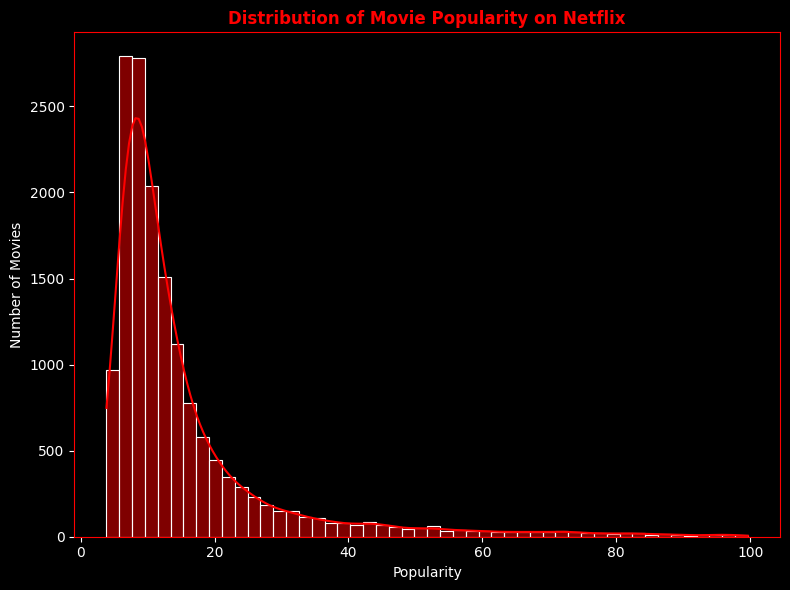

In [278]:
# Distribution of Moview Popularity
sns.histplot(x='popularity', data=movie_df[movie_df['popularity'] < 100], kde=True, bins=50)
plt.xlabel('Popularity',)
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Popularity on Netflix')
plt.tight_layout()
plt.show()

**Conclusion:** Most movies on Netflix aren’t very popular — about three-quarters have a score below 17, and only a handful are huge hits, with one even scoring 3,765. To keep the graph readable, the scale was cut off at 100, and even then more than 90% of movies score under 40. This really shows that just a few “super-hit” titles are the outliers while most stay on the lower end of popularity.

### Distribution of Movie Ratings on Netflix

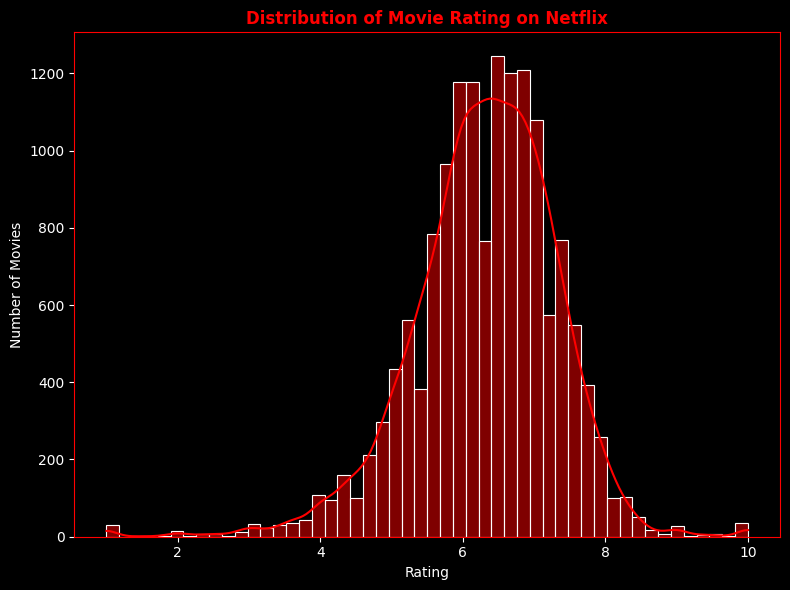

In [279]:
# Distribution of Movie Ratings
sns.histplot(x='rating', data=movie_df[movie_df['rating'] >0], kde=True, bins=50)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Rating on Netflix')
plt.tight_layout()
plt.show()

**Conclusion:** Most movies on Netflix have a rating between 5 and 7 out of 10. There are very few movies with very low ratings (below 4) or very high ratings (above 8). This shows that the majority of content is average-rated.

### Budget vs Revenue Distributions on Netflix Movies (Log Scale)

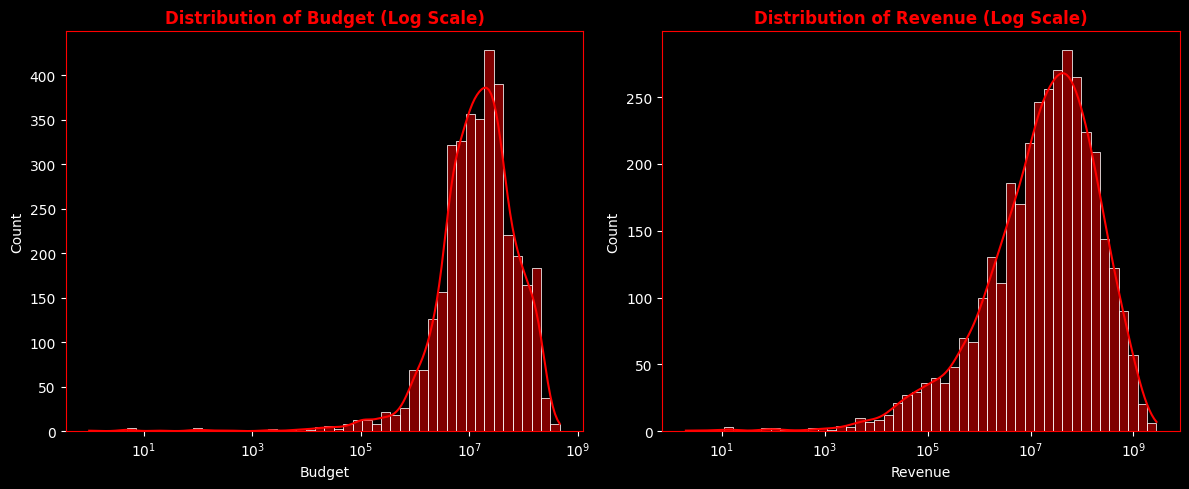

In [280]:
# Make sure budget & revenue > 0 for log scale
df_plot = movie_df[(movie_df['budget'] > 0) & (movie_df['revenue'] > 0)]

# Figure size
plt.figure(figsize=(12,5))

# Budget distribution
plt.subplot(1,2,1)
sns.histplot(df_plot['budget'], bins=50, log_scale=True,kde=True)
plt.title('Distribution of Budget (Log Scale)')
plt.xlabel('Budget')
plt.ylabel('Count')


# Revenue distribution
plt.subplot(1,2,2)
sns.histplot(df_plot['revenue'], bins=50, log_scale=True,kde=True)
plt.title('Distribution of Revenue (Log Scale)')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Conclusion:** Most movies have small or medium budgets and revenues. Only a few movies have very high budgets or make very high revenue. On the log scale we can see clearly that the big-budget and blockbuster movies are rare compared to normal movies.

### Relationship Between Budget, Revenue, Popularity and Ratings

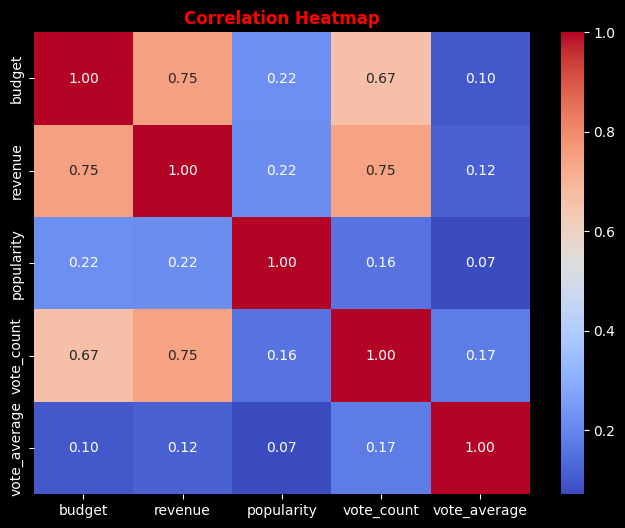

In [281]:
# Select the relevant columns
corr_cols = ['budget', 'revenue', 'popularity', 'vote_count', 'vote_average']
corr = movie_df[corr_cols].corr()   # correlation matrix

#Plot
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

**Conclusion:** Budget and revenue have a strong positive correlation (0.75), meaning bigger budgets usually lead to higher revenue. Revenue also correlates well with vote count (0.75), and budget with vote count (0.67), showing that big movies get more votes too. Popularity has only a weak link with budget, revenue, and votes, and vote_average (ratings) shows almost no correlation with the other factors. This means high ratings don’t necessarily come from high budget or high revenue movies.

# Genre Analysis

In this section, we analyze Netflix movies based on genres.
The goal is to identify:

- Most common genres available on Netflix.
- Genres associated with the highest average ratings.
- which Genres is more Popular.

### Splitting and Exploding the Genres Column  
Many movies belong to multiple genres stored as comma-separated values.  
To perform accurate genre-wise analysis, we first split the genres column into a list and then explode it so that each row contains only one genre.


In [282]:
# Spilting & Exploding
movie_df['genres'] = movie_df['genres'].astype(str).str.split(',')
movie_df_exploded = movie_df.explode('genres')
movie_df_exploded['genres'] = movie_df_exploded['genres'].astype(str).str.strip()

In [283]:
# Check the DataFrame after exploding to verify successful genre separation
movie_df_exploded['genres'].head()

0       Comedy
0    Adventure
0      Fantasy
0    Animation
0       Family
Name: genres, dtype: object

In [284]:
# Group by 'genres' to get count and average metrics for easier genre-wise analysis
genres_group = (
    movie_df_exploded.groupby('genres')
    .agg(
        number_of_movies = ('show_id','count'),
        avg_rating = ('rating','mean'),
        avg_popularity = ('popularity','mean'),
        avg_vote_count = ('vote_count','mean'),
        avg_budget = ('budget','mean'),
        avg_revenue = ('revenue','mean'),
        avg_profit = ('profit','mean')
    ).sort_values(by='number_of_movies', ascending=False).reset_index())

In [285]:
genres_group.head()

,genres,number_of_movies,avg_rating,avg_popularity,avg_vote_count,avg_budget,avg_revenue,avg_profit
0,Drama,6910,6.160090,16.719860,628.725615,6.039072e+06,1.442036e+07,8.381291e+06
1,Comedy,4533,6.073928,19.418328,716.551291,9.227067e+06,2.762601e+07,1.839894e+07
2,Thriller,3769,5.843899,24.490540,803.976652,8.134911e+06,1.982055e+07,1.168564e+07
3,Action,3239,6.073126,32.214458,1287.368632,2.086853e+07,5.672482e+07,3.585629e+07
4,Romance,2571,5.957180,19.166187,524.499806,4.620282e+06,1.333491e+07,8.714630e+06


### Top 10 Genre Base on Number of Movies

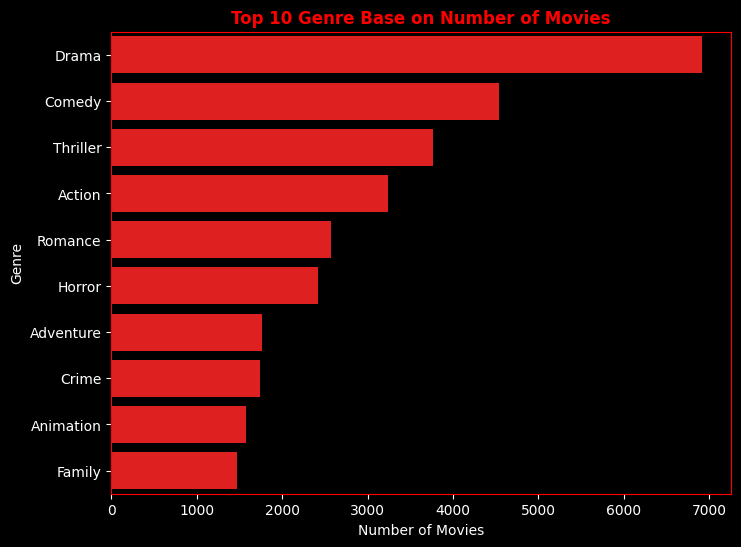

In [286]:
# Plot top 10 genres based on number of movies
sns.barplot(x='number_of_movies', y='genres', data=genres_group.head(10))
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Top 10 Genre Base on Number of Movies")
plt.show()

**Conclusion:** The most common genres on Netflix are Drama, Comedy, and Thriller, followed by Action, Romance, and Horror. Adventure, Crime, Animation, and Family are also popular but have fewer movies compared to the top genres.

### Top 10 Genres by Average Rating

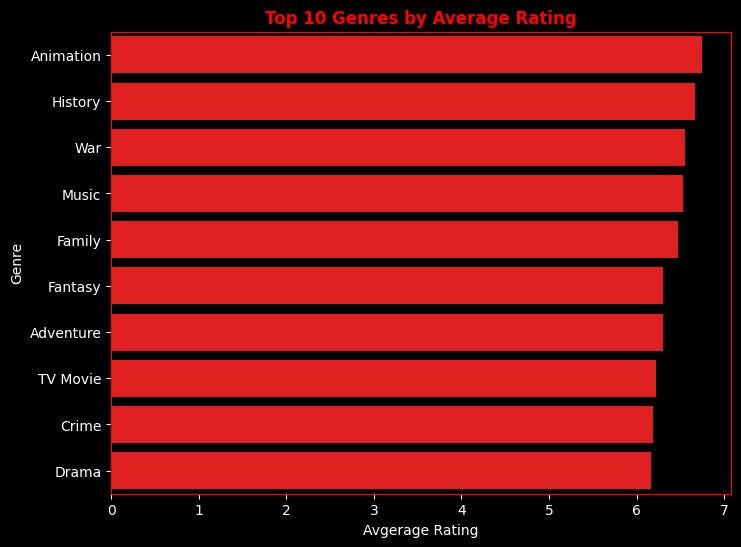

In [287]:
# Plot top 10 genres based on average rating
sns.barplot(x='avg_rating', y='genres', data=genres_group.sort_values(by='avg_rating',ascending=False).head(10))
plt.xlabel("Avgerage Rating")
plt.ylabel("Genre")
plt.title("Top 10 Genres by Average Rating")
plt.show()

**Conclusion:** Genres with the highest average ratings on Netflix include Animation, History, War, and Music. Family, Fantasy, Adventure, TV Movie, Crime, and Drama also have relatively high ratings, though slightly lower than the top ones.

### Top 10 Genres by Average Popularity

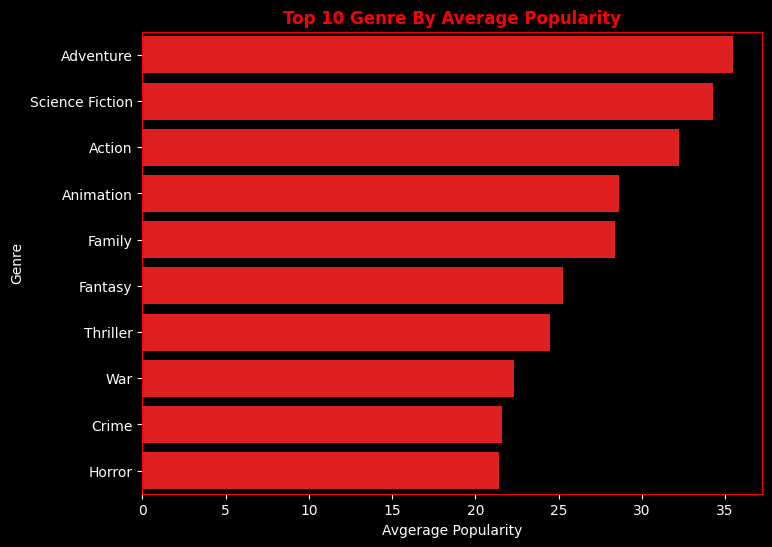

In [288]:
# Plot top 10 genres based on Average Popularity
sns.barplot(x='avg_popularity', y='genres', data=genres_group.sort_values(by='avg_popularity',ascending=False).head(10))
plt.xlabel("Avgerage Popularity")
plt.ylabel("Genre")
plt.title("Top 10 Genre By Average Popularity")
plt.show()

# Country Analysis 
In this section, we will analyze Netflix movies based on their production countries. The goal is to:
- Identify the top countries producing the most content.
- Compare countries by average ratings, budget and revenue.
- Analyze average rating and average popularity of countries 
- Study the trend of movie production over the years for leading countries.

**Note:** Some movies are released in more than one country. To handle this, we split the countries into separate rows using the explode function. The first country is taken as the primary country. Since the dataset does not tell how profit is shared, we divided the profit equally for all listed countries. This way the country analysis stays fair and balanced.

In [289]:
# Country-wise explode with primary country and equal profit distribution

# Split country column into lists
movie_df['country'] = movie_df['country'].astype(str).str.split(',')

# Create primary country (take the first one)
movie_df['primary_country'] = movie_df['country'].apply(
    lambda x: x[0].strip() if isinstance(x, list) else x
)

# Explode so each country gets its own row
movie_df_exploded = movie_df.explode('country')

# Remove extra spaces from country names
movie_df_exploded['country'] = movie_df_exploded['country'].str.strip()

# Divide profit equally among all countries for each movie
movie_df_exploded['profit_divided'] = (
    movie_df_exploded['profit'] /
    movie_df_exploded.groupby('show_id')['country'].transform('count')
)

In [290]:
# Check the DataFrame after exploding and add primary columhn
movie_df_exploded.iloc[:,[5,17]].head()

,country,primary_country
0,United States of America,United States of America
1,United Kingdom,United Kingdom
1,United States of America,United Kingdom
2,United Kingdom,United Kingdom
2,United States of America,United Kingdom


In [291]:
# Group by 'country' to get count and average metrics for easier country-wise analysis
country_group = (
    movie_df_exploded[movie_df_exploded['primary_country']!='Unknown'].groupby('primary_country')
    .agg(
        number_of_movies = ('show_id','count'),
        avg_rating = ('rating','mean'),
        avg_popularity = ('popularity','mean'),
        avg_vote_count = ('vote_count','mean'),
        avg_budget = ('budget','mean'),
        avg_revenue = ('revenue','mean'),
        avg_profit = ('profit','mean')
    ).reset_index().sort_values(by='number_of_movies', ascending=False))

# Filter countries with at least 500 movies (to avoid bias from countries with very few movies)
filtered_countries = country_group[country_group['number_of_movies'] >= 500]

### Top Producing Countries

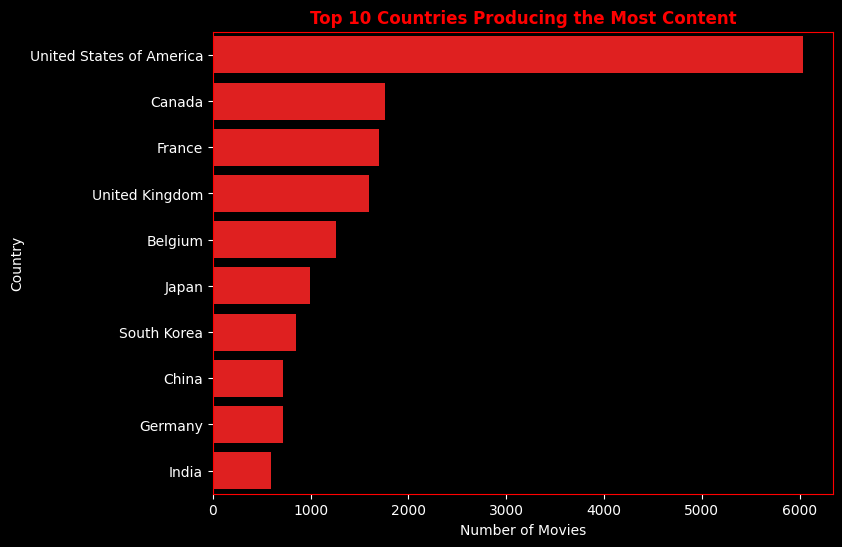

In [292]:
sns.barplot(x='number_of_movies', y='primary_country', data=filtered_countries.head(10))
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.title("Top 10 Countries Producing the Most Content")
plt.show()

**Conclusion:** The analysis shows that the United States of America is by far the leading producer of movies and shows, with over 6,000 titles. Canada, France, and the United Kingdom also contribute significantly, followed by Belgium, Japan, and South Korea. Other countries like China, Germany, and India are also active, but their production volume is much lower compared to the USA. This highlights the dominant role of the USA in global content production.

### Compare Budget, Revenue and Profit by Countries

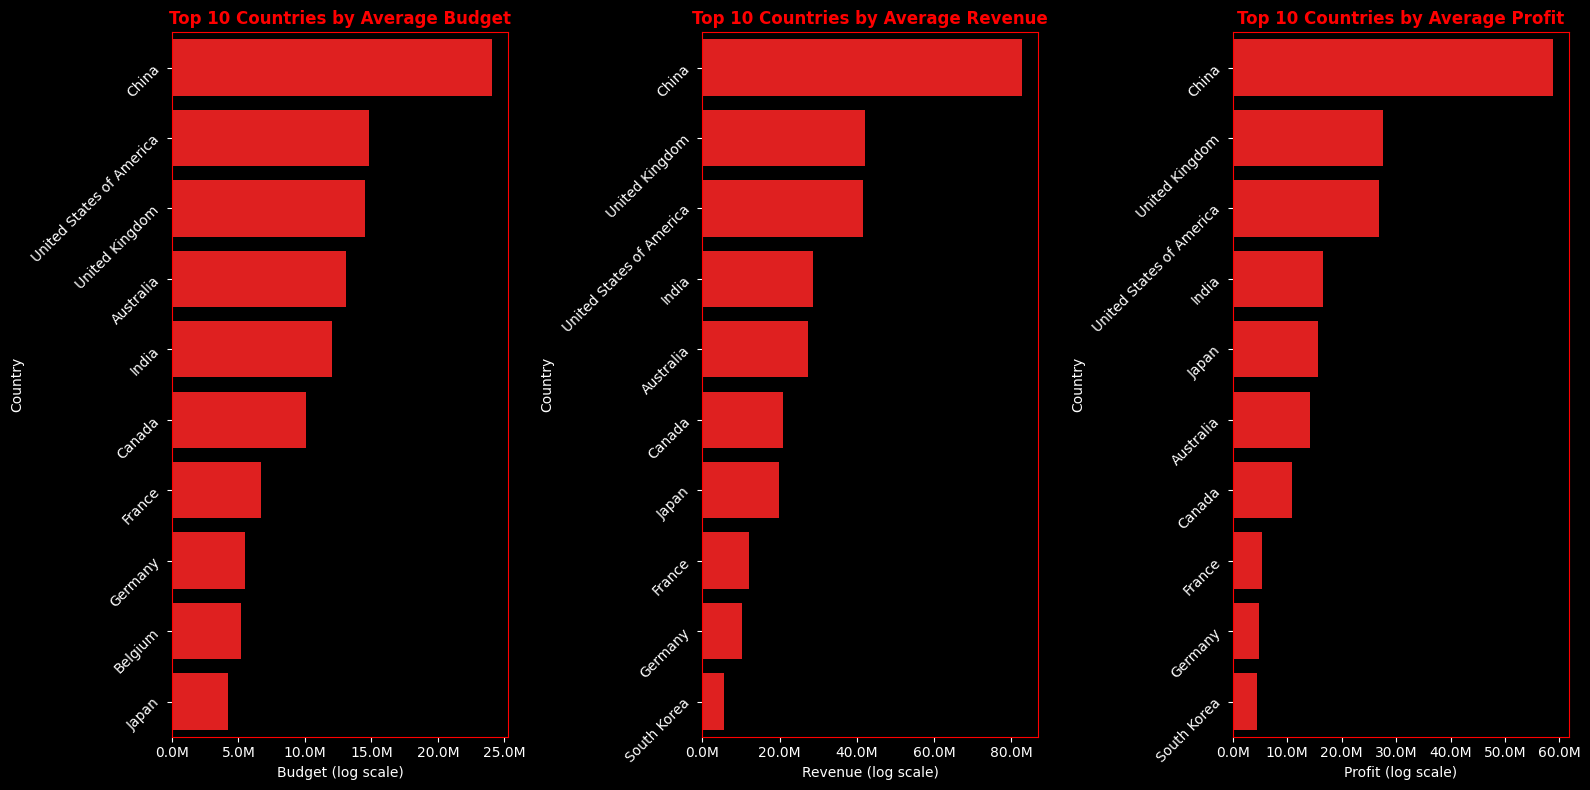

In [293]:
# Create side-by-side subplots to compare average revenue and average budget by country  
fig, axes = plt.subplots(1, 3, figsize=(16, 8))
for ax in axes:
    plt.setp(ax.get_yticklabels(), rotation=45)

# Change to Y-Axis in Million
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    return f'{x/1_000_000:.1f}M'
    
# Budget Plot
sns.barplot(
    x='avg_budget',
    y='primary_country',
    data=filtered_countries.sort_values(by='avg_budget', ascending=False).head(10),
    ax=axes[0]
)
axes[0].set_title("Top 10 Countries by Average Budget")
axes[0].set_xlabel("Budget (log scale)")
axes[0].set_ylabel("Country")
axes[0].xaxis.set_major_formatter(FuncFormatter(millions))

# Revenue Plot
sns.barplot(
    x='avg_revenue',
    y='primary_country',
    data=filtered_countries.sort_values(by='avg_revenue', ascending=False).head(10),
    ax=axes[1]
)
axes[1].set_title("Top 10 Countries by Average Revenue")
axes[1].set_xlabel("Revenue (log scale)")
axes[1].set_ylabel("Country")
axes[1].xaxis.set_major_formatter(FuncFormatter(millions))
# Profit Plot
sns.barplot(
    x='avg_profit',
    y='primary_country',
    data=filtered_countries.sort_values(by='avg_profit', ascending=False).head(10),
    ax=axes[2]
)
axes[2].set_title("Top 10 Countries by Average Profit")
axes[2].set_xlabel("Profit (log scale)")
axes[2].set_ylabel("Country")
axes[2].xaxis.set_major_formatter(FuncFormatter(millions))

plt.tight_layout()
plt.show()

**Conclusion:** China dominates with the highest average budget, revenue, and profit per movie, demonstrating exceptional overall performance. The United Kingdom and United States follow with substantial average revenue and profit figures, underscoring their massive film industries. India and Australia achieve notable profitability despite moderate budgets, indicating efficient production models. While Japan, Canada, and France operate with lower average budgets and profits, they maintain consistent revenue generation. Even countries with fewer film outputs like Belgium and Germany deliver commendable average revenue and profit per movie, reflecting quality-focused production strategies.

### Top Average Rating Countries

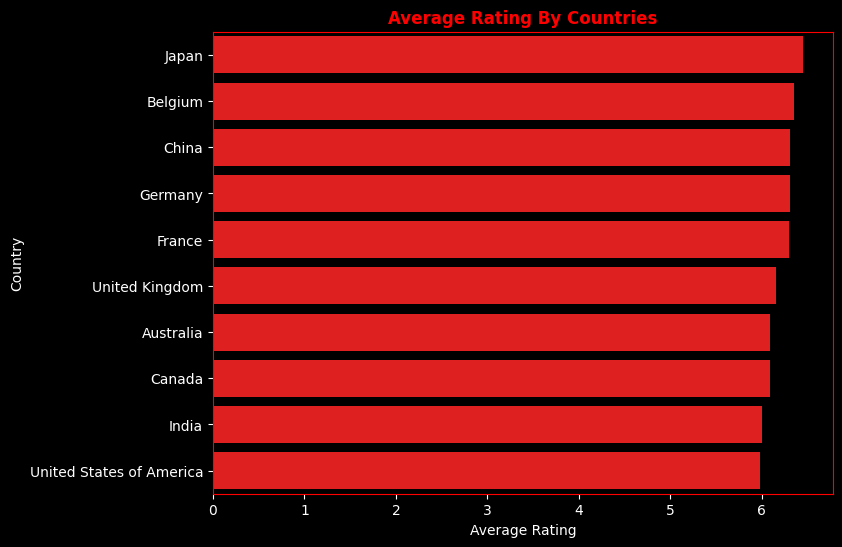

In [294]:
# Average Rating Countries
sns.barplot(x='avg_rating',y='primary_country',data=filtered_countries.sort_values(by='avg_rating',ascending=False).head(10))
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.title('Average Rating By Countries')
plt.show()

**Conclusion:** Movies from Mexico lead the way with the highest average ratings, showing strong audience appreciation. Greece and Denmark also perform well, highlighting the quality of cinema coming from Europe. Brazil and Colombia join the list, reflecting the growing influence of Latin American film industries, while Japan’s presence confirms its consistent global appeal. Overall, these countries stand out for producing content that connects strongly with viewers.

### Top Average Popularity Countries

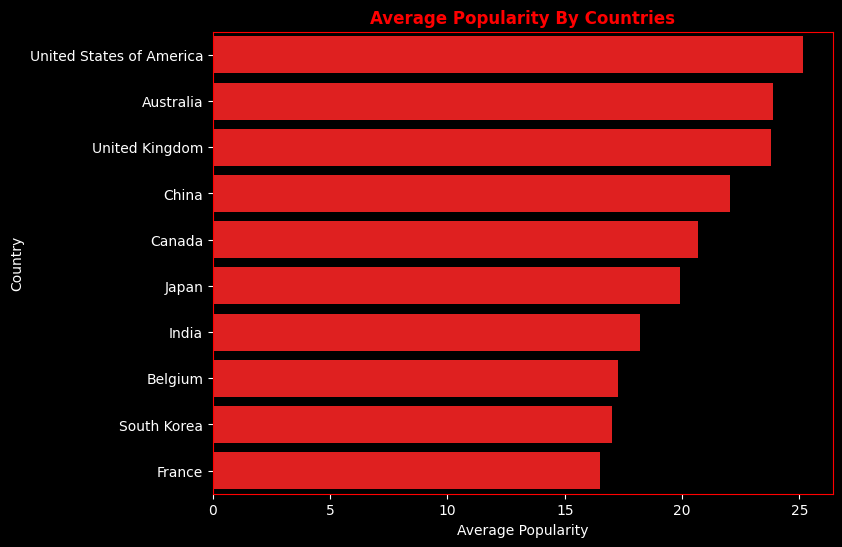

In [295]:
# Average Popularity Countries
sns.barplot(x='avg_popularity',y='primary_country',data=filtered_countries.sort_values(by='avg_popularity',ascending=False).head(10))
plt.xlabel('Average Popularity')
plt.ylabel('Country')
plt.title('Average Popularity By Countries')
plt.show()

**Conclusion:** The United States has the most popular movies by far. After that, movies from Australia and the UK are also very popular. Movies from China, Canada, and Japan are in the middle. Movies from India, Belgium, South Korea, and France are less popular but still have an audience.

### Movie Release Trend of Top 5 Countries

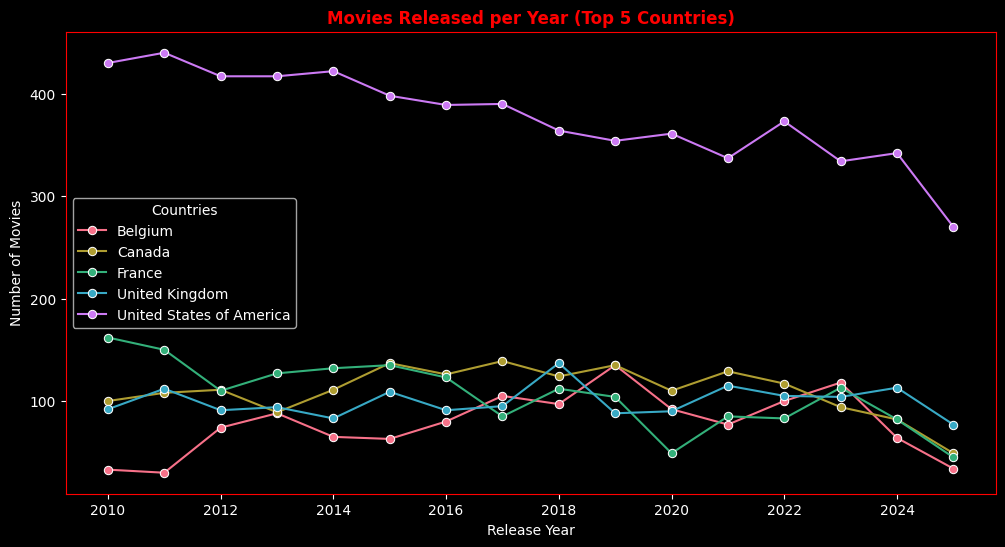

In [296]:
# Top 5 Countries
top5_countries = movie_df_exploded.groupby('primary_country')['show_id'].count().sort_values(ascending=False).head(5).index

# Filter
df_top5 = movie_df_exploded[movie_df_exploded['primary_country'].isin(top5_countries)]

# Group By
trend_df = df_top5.groupby(['release_year','primary_country'], as_index=False)['show_id'].count()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year',y='show_id',hue='primary_country',data=trend_df,marker='o')
plt.title('Movies Released per Year (Top 5 Countries)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Countries')
plt.show()

**Conclusion:** From 2010 to 2025, the United States consistently released far more movies each year than any other country, staying above 300–400 releases annually but showing a slight decline after 2020. Canada, France, the United Kingdom and Belgium produced far fewer films, mostly between 50 and 150 per year, with small ups and downs over time. Overall, the chart shows that the U.S. dominates movie production, while the other top countries have much smaller and more variable outputs.

# Language Analysis

In this section, we analyze Netflix movies based on languages.
The goal is to identify:

- Most common languages used in Netflix movies.
- Languages associated with the highest average ratings.
- Languages generating the most profit.

### Language-wise Movie Distribution

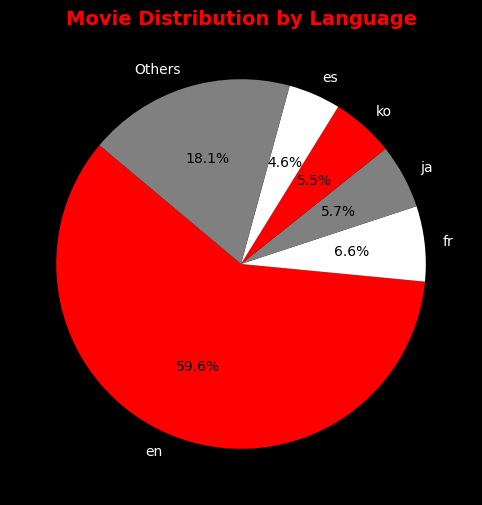

In [297]:
# Top 5 languages by number of movies
top_languages = movie_df['language'].value_counts().head(5)

# Calculate 'Others' as sum of remaining languages
others_count = movie_df['language'].value_counts().iloc[5:].sum()
top_languages['Others'] = others_count

# Pie chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    top_languages,
    labels=top_languages.index,
    autopct='%1.1f%%',
    startangle=140
)

# Set language labels to white
for text in texts:
    text.set_color('white')

# Set percentage text to black
for autotext in autotexts:
    autotext.set_color('black')

plt.title("Movie Distribution by Language", fontsize=14, fontweight='bold', color='red')
plt.show()

**Conclusion:** From the pie chart, we can see that English is the main language in movies with 59.6%. Other languages like French (6.6%), Japanese (5.7%), Korean (5.5%) and Spanish (4.6%) also have some share. The remaining 18.1% (“Others”) shows many more languages are used. This means English is the most common, but movies are still made in many other languages too.

In [298]:
# Group by 'languate' to get count and average metrics for easier language-wise analysis
language_group = (
    movie_df_exploded.groupby('language')
    .agg(
        number_of_movies = ('show_id','count'),
        avg_rating = ('rating','mean'),
        avg_popularity = ('popularity','mean'),
        avg_vote_count = ('vote_count','mean'),
        avg_budget = ('budget','mean'),
        avg_revenue = ('revenue','mean'),
        avg_profit = ('profit','mean')
    ).reset_index().sort_values(by='number_of_movies', ascending=False))

language_filtered=language_group[language_group['number_of_movies']>=100]

**Note:** While analyzing languages, I included only those languages in which 100 or more movies have been produced. This is because languages with fewer movies can produce biased or misleading results, which may distort the overall trend. Focusing on languages with a larger sample size makes the analysis more reliable and fair.

### Top Average Rating Languages

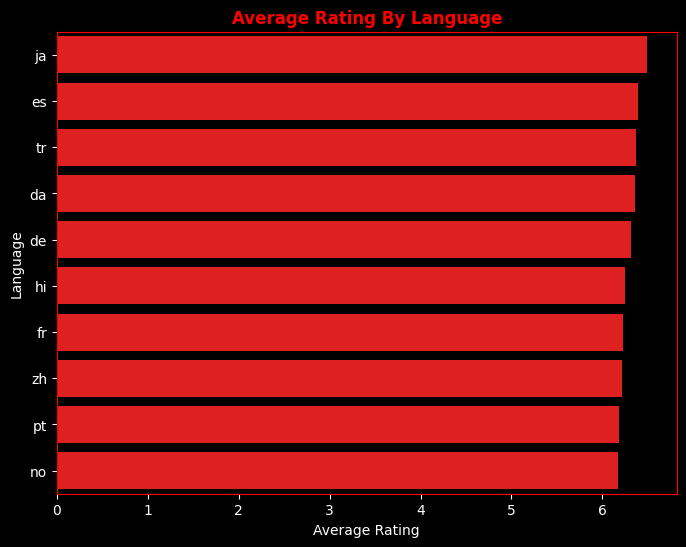

In [299]:
# Plot Average Rating languages
sns.barplot(x='avg_rating',y='language',data=language_filtered.sort_values(by='avg_rating',ascending=False).head(10))
plt.xlabel('Average Rating')
plt.ylabel('Language')
plt.title('Average Rating By Language')
plt.show()

**Conclusion:** Japanese-language films receive the highest average rating of 6.49, making them the top-rated in the dataset. They are closely followed by Spanish and Turkish movies. While all languages listed have a respectable average score above 6.0, the data shows that Japanese cinema has a slight edge in critical or audience reception compared to other major film industries.

### Top Average Porfit Languages

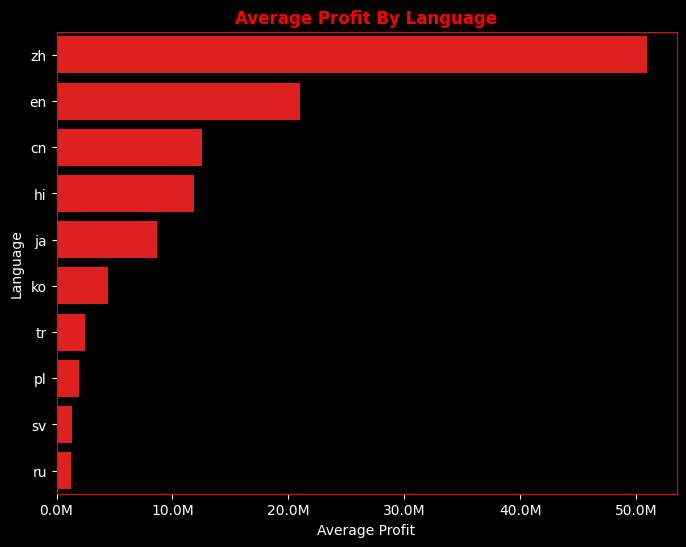

In [300]:
# Plot of Average Profit Language
sns.barplot(x='avg_profit',y='language',data=language_filtered.sort_values(by='avg_profit',ascending=False).head(10))
plt.xlabel('Average Profit') 
plt.ylabel('Language')
plt.title('Average Profit By Language') 
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

**Conclusiom:** From the chart, Chinese (zh) movies make the most profit, earning over $50 million on average — more than double English (en) movies. Hindi (hi) and Japanese (ja) movies also earn good profits. This shows the Asian movie market, especially China, is very strong. English movies still make profit but are in second place in this measure.

# Director Analysis  

In this section, we analyze Netflix movies based on directors.  
The goal is to identify:  
- Top directors with the highest number of movies.  
- Most profitable directors.  
- Directors with the best average ratings. 

### Top directors with the highest number of movies.  


In [301]:
# Director-wise grouping
director_group = (
    movie_df[movie_df['director']!='Unknown'].groupby('director')
    .agg(
        number_of_movies = ('show_id','count'),
        avg_rating = ('rating','mean'),
        avg_popularity = ('popularity','mean'),
        avg_vote_count = ('vote_count','mean'),
        avg_budget = ('budget','mean'),
        avg_revenue = ('revenue','mean'),
        avg_profit = ('profit','mean')
    ).reset_index().sort_values(by='number_of_movies', ascending=False)
)

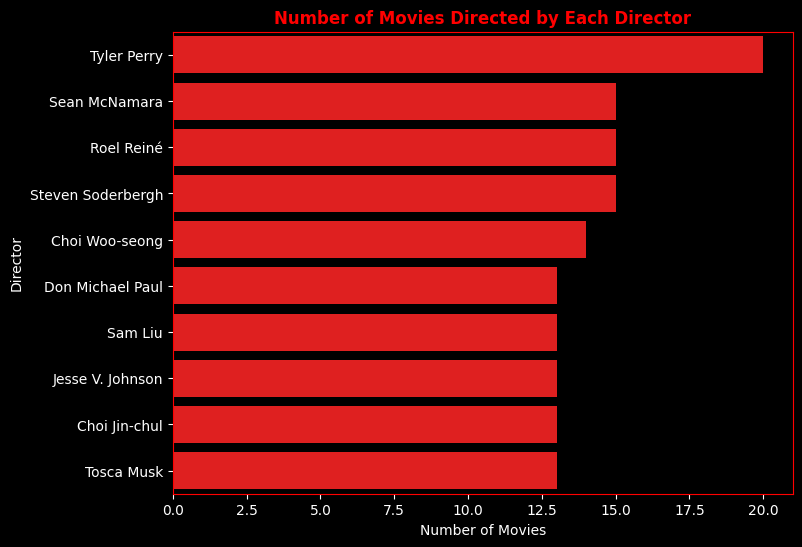

In [302]:
# Plot the top 10 directors with the highest number of movies using a horizontal bar chart  
sns.barplot(x='number_of_movies', y='director', data=director_group.head(10))
plt.title('Number of Movies Directed by Each Director')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

**Conclusion:** Tyler Perry directed the highest number of movies (20), making him the most prolific director in this list. Other directors like Sean McNamara, Roel Reiné, and Steven Soderbergh follow with 15 movies each, while the rest directed 13–14 movies.

### Directors with the best average ratings. 

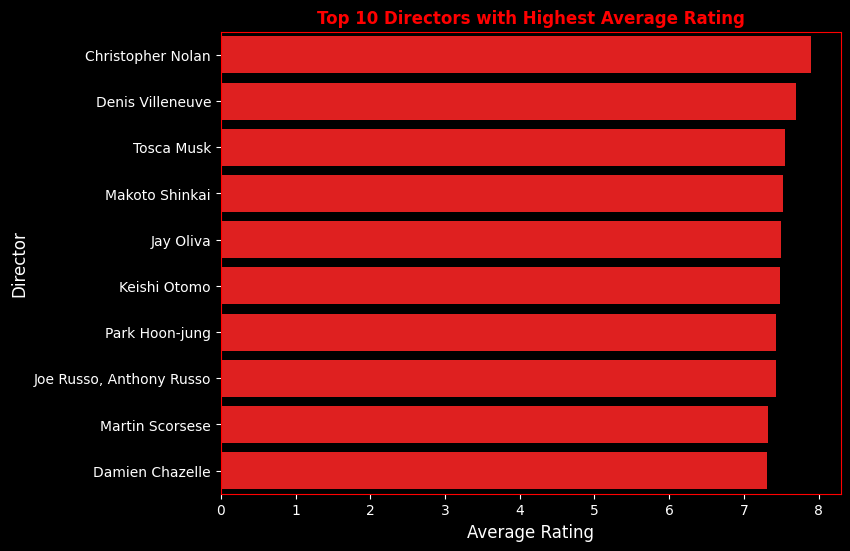

In [303]:
# Keep only directors with more than 5 movies to ensure reliable averages  
filtered=director_group[director_group['number_of_movies']>5]

# Plot Average Rating by Director
sns.barplot(x='avg_rating',y='director',data=filtered.sort_values(by='avg_rating',ascending=False).head(10))
plt.title('Top 10 Directors with Highest Average Rating')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()

**Conclusion:** Based on Bar Plot, Christopher Nolan holds the highest average movie rating among directors, followed closely by Denis Villeneuve, Tosca Musk, Makoto Shinkai and Jay Oliva. This indicates that these directors consistently produce highly-rated movies, reflecting strong audience and critic appreciation for their work.

### Top Profitable Directors

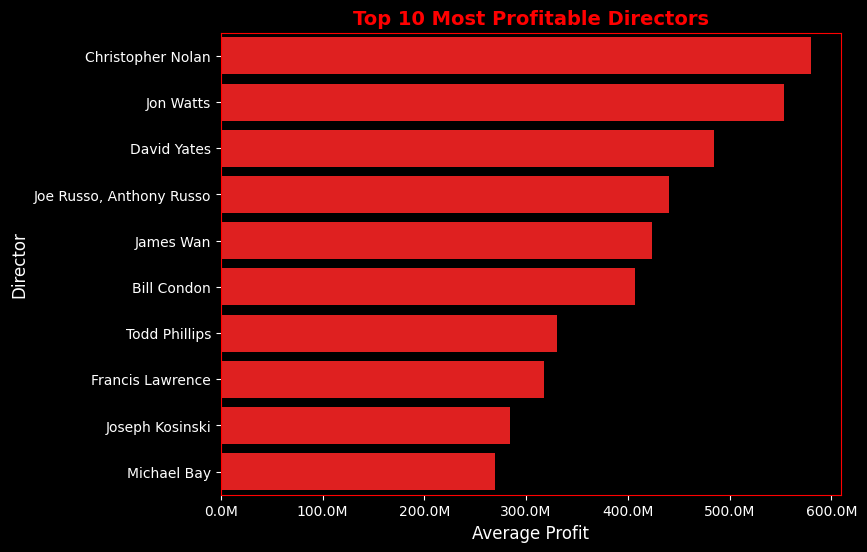

In [304]:
# Select the top 10 directors with the highest average profit  
top_profitable = filtered.sort_values(by='avg_profit', ascending=False).head(10)

# Bar plot of the top 10 most profitable directors (log scale for better visibility)  
sns.barplot(x='avg_profit', y='director', data=top_profitable)
plt.title("Top 10 Most Profitable Directors", fontsize=14, fontweight='bold', color='red')
plt.xlabel("Average Profit", fontsize=12)
plt.ylabel("Director", fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

**Conclusion:** Christopher Nolan stands out as the most profitable director, earning an average profit of nearly $600 million per movie. He is followed by Jon Watts and David Yates. The list is dominated by directors associated with big-budget blockbuster franchises and action films, highlighting how involvement in major film series is a key driver of high profitability.

# Overall Conclusion

- Netflix's catalog is dominated by U.S. productions and English-language content, with a rich variety of genres appealing to diverse audiences.  
- Most movies have moderate popularity and average ratings, while a few high-budget blockbusters generate exceptional revenue and profit.  
- Financial success is often linked to high production budgets and international appeal, though some exceptions exist.  
- Content has been consistently added over the years, reflecting a steady growth strategy.  
- Netflix balances specialized independent films with major releases, ensuring both broad reach and engagement with focused audiences.
